# Jetlag file creation notebook


This notebook will create the final version of the data that can be analysed for chapter 2/circadian disruption project. The data needs to be checked that the LDR is fine, and then annotated and saved. 

Explicit steps as follows: 
1. Import data  
2. Visualise data  
3. Remap the LDR so high = 200, low =0 <- may involve fixing any errors
4. Find the transitions between the conditions 
5. Label the different conditions in the light_period column
6. save the data 


In [1]:
import pathlib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import actigraphy_analysis.actogram_plot as act


In [2]:
# set some constants 
chamber = "6B"
label_col = "light_period"
def quickplot(data):
    data.plot(subplots=True,
              figsize=(20,10))

### Step One - Import the data

In [3]:
input_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                         "09_pirdata/03_experiment_files")
file_name = "exp_9_6B_pir_data.csv"
file_path = input_dir / file_name
data = pd.read_csv(file_path,
                   index_col=0,
                   parse_dates=True)

In [4]:
# fix a few required settings in the dataframe
# sort index
# remove chamber column 
data.sort_index(inplace=True)
chamber_col = data.pop(chamber)

In [5]:
cols = ["PIR1",
       "PIR2",
       "PIR3",
       "PIR4",
       "PIR5",
       "PIR6",
       "LDR"]
data.columns = cols

### Step Two - Visualise the data 

Check to see if any obvious errors, especially in the LDR

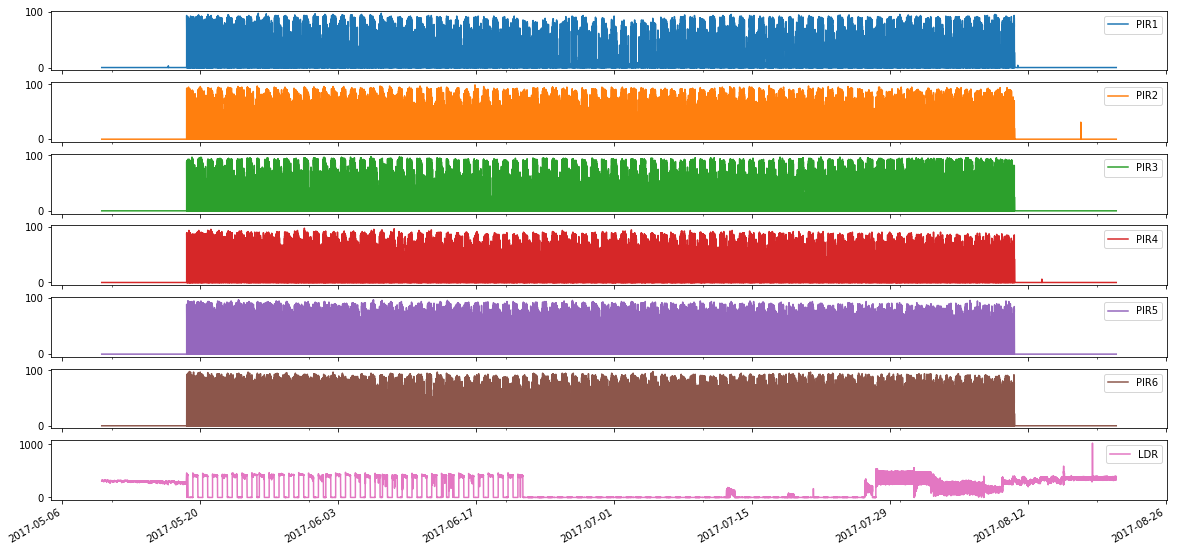

In [6]:
quickplot(data)

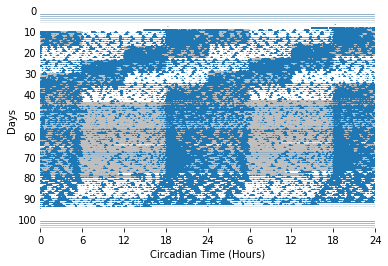

In [7]:
act.actogram_plot_from_df(data, 
                          animal_number=0,
                          period="24H",
                          showfig=True)

Conclusion?

Clear issue with the LDR - stuck at zero from day ~45 to day 80.
Need to remap

### Step Three - remap LDR?

Select the LDR for the first week of normal LD (day ~34 onwards)  
copy over the remaining days   
set the remaining LDR days to 0  

In [8]:
# key times? 
post_baseline_start = '2017-06-21 06:00:00'
dd_start = '2017-07-27 06:00:00'

In [9]:
# select the LDR from a day with correct LDR values
template_day = '2017-06-19'
ldr_label = data.columns[-1]
ldr_template = data.loc[template_day,ldr_label].values

In [10]:
# loop through every day and set the LDR to be those values
days = pd.period_range(start=post_baseline_start,
                       end=dd_start,
                       freq="D")
for day in days[1:-1]:
    data_length = len(data.loc[str(day)])
    data.loc[str(day),ldr_label] = ldr_template[:data_length]

In [11]:
# set the ldr for constant dark to = 0
data.loc[dd_start:,ldr_label] = 0

In [12]:
# activity start?
# data.loc['2017-05-18',:"PIR6"].first_valid_index()
activity_start = "2017-05-18 00:00"
data.loc[:activity_start] = 0

In [13]:
# activity_end?
#data.loc['2017-08-12':'2017-08-10':-1,:"PIR6"].first_valid_index()
activity_end = '2017-08-13 00:00'
data.loc[activity_end:] = 0

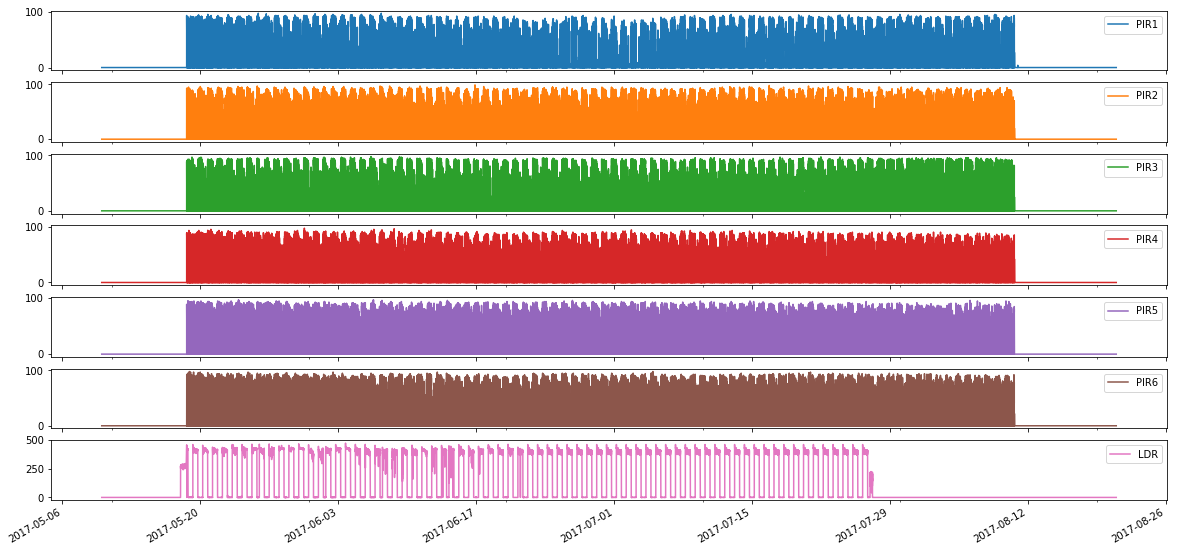

In [14]:
quickplot(data)

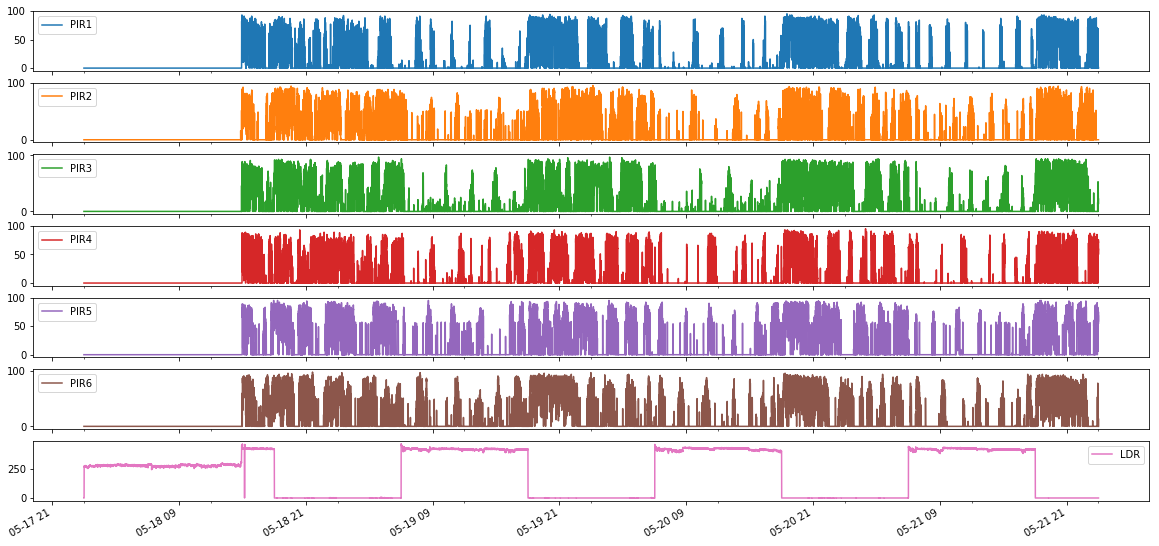

In [15]:
quickplot(data.loc['2017-5-18':'2017-5-21'])

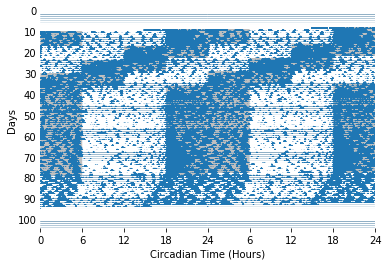

In [16]:
act.actogram_plot_from_df(data,0,figsize=(20,10),showfig=True)

### Step four - find transitions and label

comes from dlan actograms notebook in old github

In [17]:
# create new df to label 
data_annotated = data.copy()

In [18]:
# Define the baseline period 
baseline_start = '2017-5-19 06:00:50'
baseline_end = '2017-5-25 06:00:50'
baseline_data = data.loc[baseline_start:baseline_end]

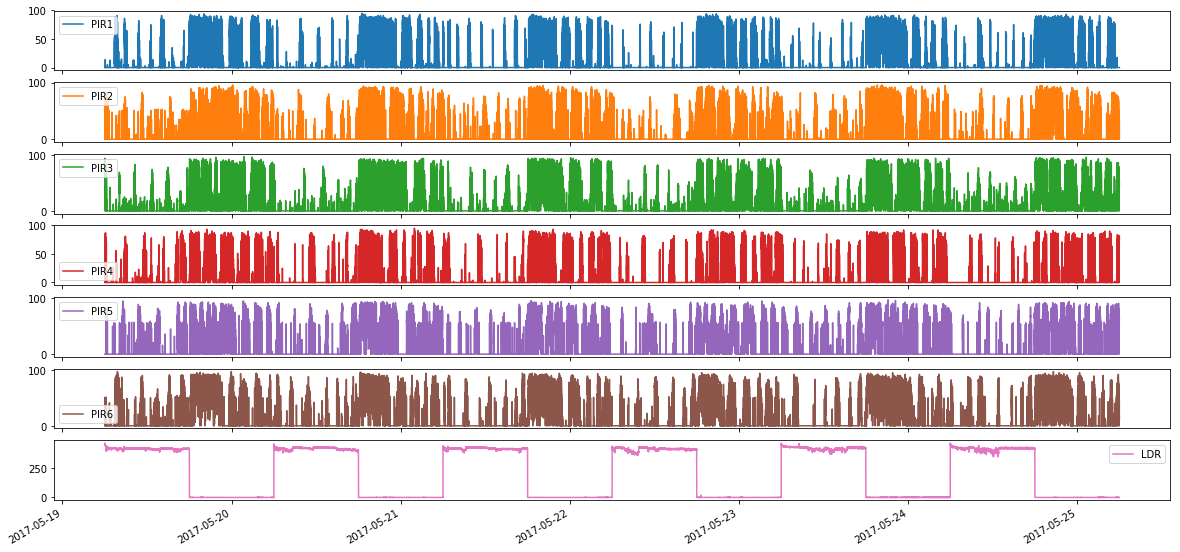

In [ ]:
quickplot(baseline_data)

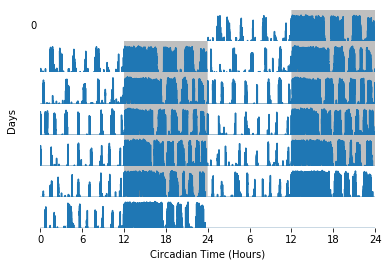

In [ ]:
act.actogram_plot_from_df(baseline_data, 0)

In [ ]:
# set the light_period_column 
data_annotated.loc[baseline_start:baseline_end,
                   label_col] = "baseline"

In [ ]:
# Disrupted period 
disrupted_start = "2017-5-25 06:00:55"
disrupted_end = "2017-6-21 06:00:55"
disrupted_data = data.loc[disrupted_start:disrupted_end]

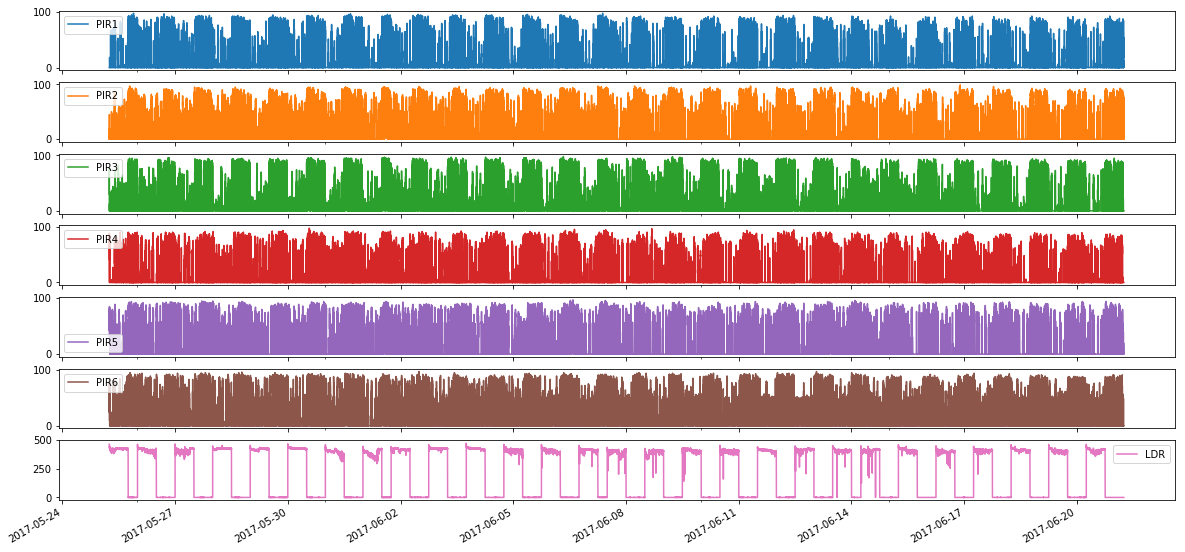

In [ ]:
quickplot(disrupted_data)

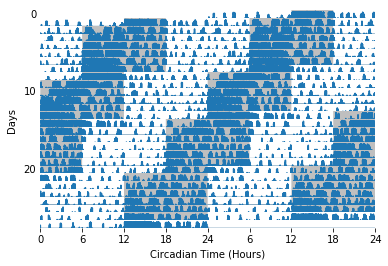

In [ ]:
act.actogram_plot_from_df(disrupted_data, 0)

In [ ]:
data_annotated.loc[disrupted_start:disrupted_end,
                   label_col] = "disrupted"

In [ ]:
post_baseline_start = "2017-06-21 06:00:55"
post_baseline_end = "2017-07-27 06:00:55"
post_baseline_data = data.loc[post_baseline_start:
                              post_baseline_end]

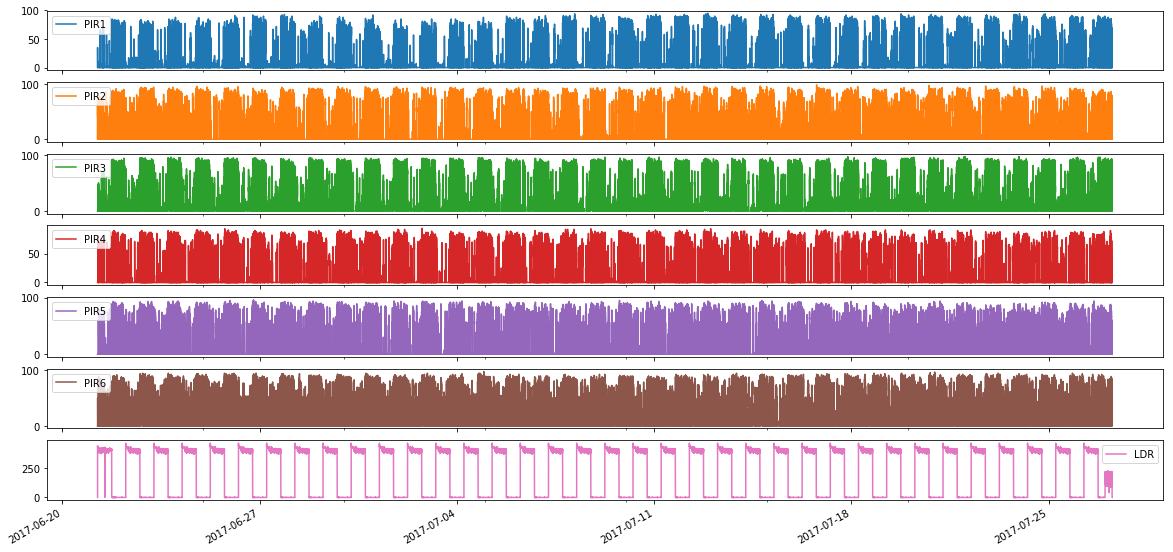

In [ ]:
quickplot(post_baseline_data)

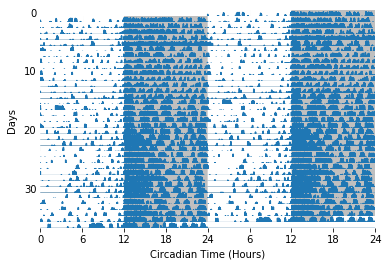

In [ ]:
act.actogram_plot_from_df(post_baseline_data,0)

In [ ]:
data_annotated.loc[post_baseline_start:post_baseline_end,
                   label_col] = "post_baseline"

In [ ]:
dd_start = "2017-07-27 06:00:55"
dd_end = "2017-8-10 06:00:55"
dd_data = data.loc[dd_start:dd_end]

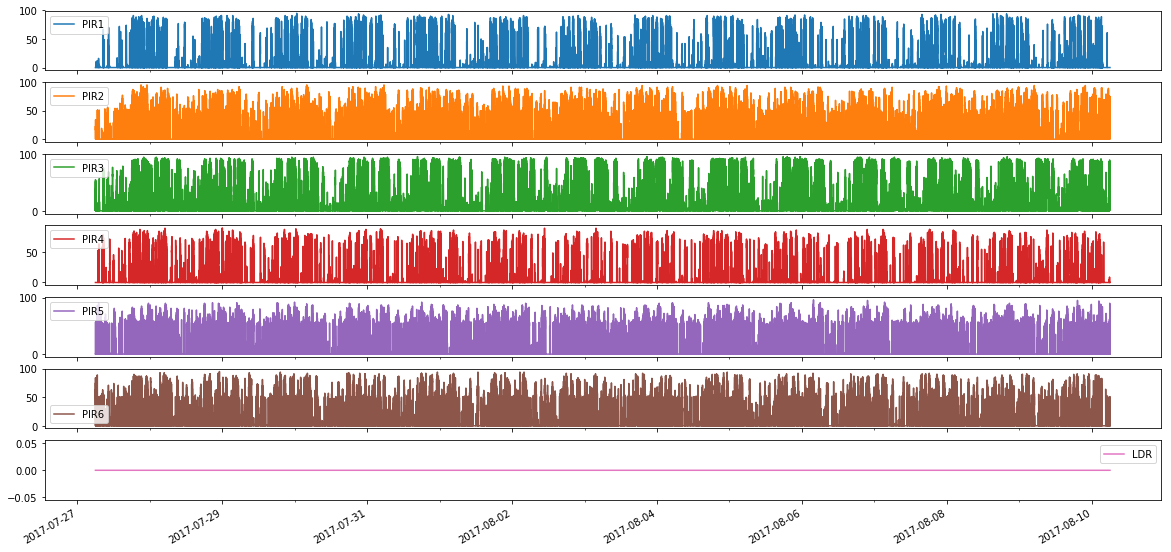

In [ ]:
quickplot(dd_data)

act.actogram_plot_from_df(dd_data,0)

In [ ]:
data_annotated.loc[dd_start:dd_end,
                   label_col] = "post_dd"

In [ ]:
data_reset = data_annotated.reset_index()
index_to_use = [data_reset.columns[-1], data_reset.columns[0]]
data_reset.set_index(index_to_use, inplace=True) 

In [ ]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/"
                        "01_PhD_files/01_projects/"
                        "01_thesisdata/02_circdis/"
                        "01_data_files/01_activity")
file_name = "Jetlag.csv"
file_path = save_dir / file_name
data_reset.to_csv(file_path)

### Bonus extra

Plot the actogram for just the parts we are interested in

In [ ]:
df_act_plot = data.loc[baseline_start:
                       post_baseline_end]
act.actogram_plot_from_df(df_act_plot, 0)

In [ ]:
data_test = data.loc[post_baseline_start:]
act.actogram_plot_from_df(data_test,0)
